<a href="https://colab.research.google.com/github/Mr-RAKSHIT-2004-GUPTA/Rigression/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from datetime import date
from sklearn.datasets import load_iris
data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.isna().sum()
#

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [ ]:
#changing the dataframe for binary classification
df_final = df[df['target']!= 2]

In [ ]:
df_final.target.value_counts()

,count
target,
0,50
1,50


In [ ]:
X = df_final.iloc[:,:-1]
y = df_final.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#

In [ ]:
X_train.shape

(80, 4)

In [ ]:
y_train.shape

(80,)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier

LogisticRegression()

In [ ]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = classifier.predict(X_test)#this predict class instead of probability

In [ ]:
classifier.predict_proba(X_test)#corresponding to higher probability class is predicted , cutoff 0.5

array([[0.00118455, 0.99881545],
       [0.01579803, 0.98420197],
       [0.00304709, 0.99695291],
       [0.96959941, 0.03040059],
       [0.94269372, 0.05730628],
       [0.97161144, 0.02838856],
       [0.99356322, 0.00643678],
       [0.0316902 , 0.9683098 ],
       [0.97460702, 0.02539298],
       [0.9789308 , 0.0210692 ],
       [0.95512884, 0.04487116],
       [0.96072669, 0.03927331],
       [0.00430743, 0.99569257],
       [0.98586374, 0.01413626],
       [0.00927792, 0.99072208],
       [0.98146423, 0.01853577],
       [0.00207948, 0.99792052],
       [0.00125531, 0.99874469],
       [0.97461564, 0.02538436],
       [0.96116169, 0.03883831]])

In [ ]:
#Evaluation matrics
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
print(confusion_matrix(y_pred,y_test))

[[12  0]
 [ 0  8]]


In [ ]:
print(accuracy_score(y_pred,y_test))

1.0


In [ ]:
classification_report(y_test,y_pred).split('\n')
#

['              precision    recall  f1-score   support',
 '',
 '           0       1.00      1.00      1.00        12',
 '           1       1.00      1.00      1.00         8',
 '',
 '    accuracy                           1.00        20',
 '   macro avg       1.00      1.00      1.00        20',
 'weighted avg       1.00      1.00      1.00        20',
 '']

In [ ]:
from sklearn.metrics import roc_curve , auc
import matplotlib.pyplot as plt
classifier.predict_proba(X_test)[:,1]#probabilty for class 1

array([0.99881545, 0.98420197, 0.99695291, 0.03040059, 0.05730628,
       0.02838856, 0.00643678, 0.9683098 , 0.02539298, 0.0210692 ,
       0.04487116, 0.03927331, 0.99569257, 0.01413626, 0.99072208,
       0.01853577, 0.99792052, 0.99874469, 0.02538436, 0.03883831])

In [ ]:
y_pred_proba = classifier.predict_proba(X_test)[:,1]

In [ ]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

In [ ]:
fpr

array([0., 0., 0., 1.])

In [ ]:
tpr

array([0.   , 0.125, 1.   , 1.   ])

In [ ]:
thresholds

array([       inf, 0.99881545, 0.9683098 , 0.00643678])

In [ ]:
roc_auc = auc(fpr,tpr)
roc_auc #area under curve

1.0

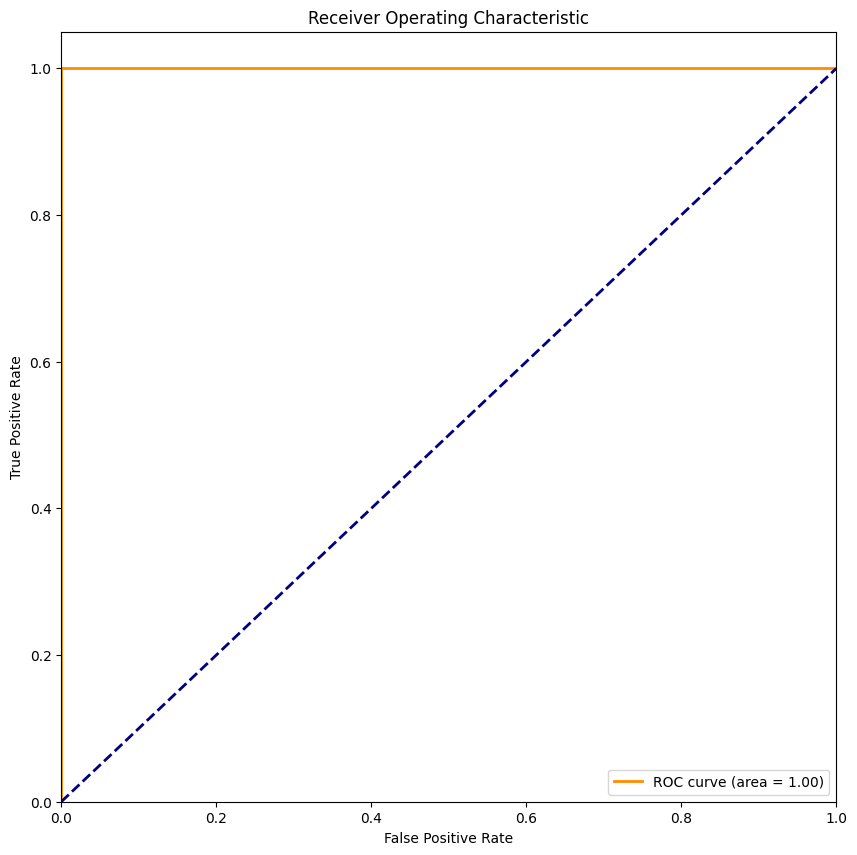

In [ ]:
#plot roc-auc curve
plt.figure(figsize = (10,10))
plt.plot(fpr,tpr,color = 'darkorange',linewidth = 2 ,label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color = 'navy',linewidth = 2,linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()
#

In [46]:
#cross validation
from sklearn.linear_model import LogisticRegressionCV
lr_model = LogisticRegressionCV(cv = 5)
lr_model.fit(X_train,y_train)
lr_model.predict(X_test)


array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5 )

In [ ]:
cv

KFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier,X_train,y_train,cv=cv,scoring='accuracy')

In [ ]:
scores

array([1., 1., 1., 1., 1.])